In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

In [3]:
df = pd.read_csv('tox21.csv')
df

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX2725,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


In [4]:
df.isnull().sum()

NR-AR             566
NR-AR-LBD        1073
NR-AhR           1282
NR-Aromatase     2010
NR-ER            1638
NR-ER-LBD         876
NR-PPAR-gamma    1381
SR-ARE           1999
SR-ATAD5          759
SR-HSE           1364
SR-MMP           2021
SR-p53           1057
mol_id              0
smiles              0
dtype: int64

In [8]:
df = df.dropna(subset=['SR-ATAD5']).copy()
df.isnull().sum()

NR-AR             105
NR-AR-LBD         464
NR-AhR            730
NR-Aromatase     1351
NR-ER             967
NR-ER-LBD         323
NR-PPAR-gamma     721
SR-ARE           1726
SR-ATAD5            0
SR-HSE           1206
SR-MMP           1439
SR-p53            448
mol_id              0
smiles              0
dtype: int64

In [9]:
df['mol'] = df['smiles'].apply(Chem.MolFromSmiles)
df.head()

[16:31:10] WARNING: not removing hydrogen atom without neighbors
[16:31:10] Explicit valence for atom # 3 Al, 6, is greater than permitted
[16:31:10] Explicit valence for atom # 4 Al, 6, is greater than permitted
[16:31:10] Explicit valence for atom # 4 Al, 6, is greater than permitted
[16:31:10] Explicit valence for atom # 9 Al, 6, is greater than permitted
[16:31:10] Explicit valence for atom # 5 Al, 6, is greater than permitted
[16:31:10] Explicit valence for atom # 16 Al, 6, is greater than permitted
[16:31:11] Explicit valence for atom # 20 Al, 6, is greater than permitted


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,mol
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e10e0>
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e11c0>
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e1230>
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e12a0>
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,TOX5110,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e1310>


In [10]:
df.isnull().sum()

NR-AR             105
NR-AR-LBD         464
NR-AhR            730
NR-Aromatase     1351
NR-ER             967
NR-ER-LBD         323
NR-PPAR-gamma     721
SR-ARE           1726
SR-ATAD5            0
SR-HSE           1206
SR-MMP           1439
SR-p53            448
mol_id              0
smiles              0
mol                 7
dtype: int64

In [11]:
df = df.dropna(subset=['mol']).copy()
df_data = df.drop(['mol', 'smiles', 'mol_id'], axis=1)
df_data_forPlot = df_data.isnull().sum().reset_index()
df_data_forPlot.columns = ['Toxicity_type', 'NumOfNull']

In [12]:
display(df_data_forPlot)

,Toxicity_type,NumOfNull
0,NR-AR,105
1,NR-AR-LBD,464
2,NR-AhR,730
3,NR-Aromatase,1350
4,NR-ER,967
5,NR-ER-LBD,323
6,NR-PPAR-gamma,721
7,SR-ARE,1725
8,SR-ATAD5,0
9,SR-HSE,1205


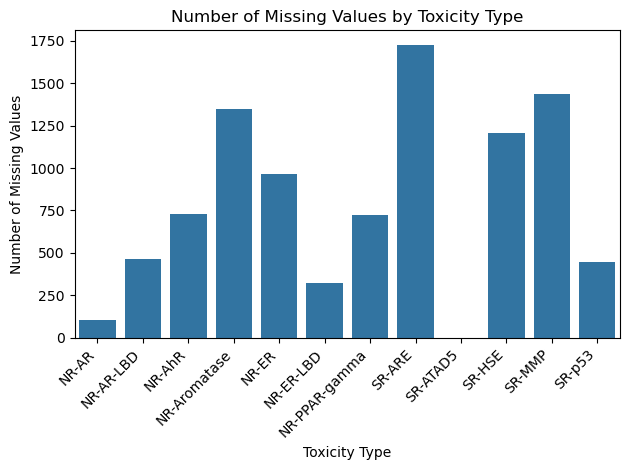

In [13]:
# making a bar plot to show the data
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(data=df_data_forPlot, x='Toxicity_type', y='NumOfNull')

# Customize
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Number of Missing Values by Toxicity Type')
plt.xlabel('Toxicity Type')
plt.ylabel('Number of Missing Values')
plt.tight_layout()
plt.show()

In [14]:
df['fingerprint'] = df['mol'].apply(AllChem.RDKFingerprint)
df['fingerprint_string'] = df['fingerprint'].apply(lambda x: x.ToBitString())
df

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,mol,fingerprint,fingerprint_string
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e10e0>,"[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1011110000100000010101010100001101100010100010...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e11c0>,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, ...",0000110010100010101000000000011010001000000110...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e1230>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",0000000000010101110010110001000000010000001000...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e12a0>,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0010000000001000000000100000000000000100010000...
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,TOX5110,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e1310>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0000000000000010000000000000000000100010000000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX25184,CCCNCC(O)COc1ccccc1C(=O)CCc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x7f661e703c30>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0000000000000000000010000001000000000000000010...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,<rdkit.Chem.rdchem.Mol object at 0x7f661e703ca0>,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0000001010000000000000001000010000010100010000...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,<rdkit.Chem.rdchem.Mol object at 0x7f661e703d10>,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0000001010000000000000001000010000010100010000...
7829,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7f661e703d80>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0000000000100000000100001000010100110000010000...


In [15]:
df_X = pd.DataFrame()

columns_to_add = {}
for n in range(len(df['fingerprint_string'].iloc[0])):
    columns_to_add[f"{n}th"] = df['fingerprint_string'].apply(lambda x: int(x[n]))

new_cols_df = pd.DataFrame(columns_to_add)
df_X = pd.concat([df_X, new_cols_df], axis=1)

In [16]:
df_X.head()

,0th,1th,2th,3th,4th,5th,6th,7th,8th,9th,...,2038th,2039th,2040th,2041th,2042th,2043th,2044th,2045th,2046th,2047th
0,1,0,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Preparing data for SR-ATAD5

In [30]:
from sklearn.preprocessing import StandardScaler            # for scaling the data
from sklearn.model_selection import train_test_split        # for splitting the data into training and testing sets
from sklearn.model_selection import cross_val_score, KFold  # for K-fold cross-validation
from sklearn.linear_model import LinearRegression           # for creating a linear regression model
from sklearn.ensemble import RandomForestClassifier          # for creating a random forest regression model
from sklearn.dummy import DummyRegressor                    # for creating a base regressor to compare the model with
from sklearn.metrics import mean_squared_error, r2_score    # for evaluating the model
from sklearn.pipeline import make_pipeline                  # for building operational pipelines

In [31]:
#df['FingerPrintArray'] = df['fingerprint'].apply(lambda x: np.array(x))

In [32]:
display(df)

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,mol,fingerprint,fingerprint_string
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e10e0>,"[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1011110000100000010101010100001101100010100010...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e11c0>,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, ...",0000110010100010101000000000011010001000000110...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e1230>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",0000000000010101110010110001000000010000001000...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e12a0>,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0010000000001000000000100000000000000100010000...
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,TOX5110,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x7f661e5e1310>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0000000000000010000000000000000000100010000000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX25184,CCCNCC(O)COc1ccccc1C(=O)CCc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x7f661e703c30>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0000000000000000000010000001000000000000000010...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,<rdkit.Chem.rdchem.Mol object at 0x7f661e703ca0>,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0000001010000000000000001000010000010100010000...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,<rdkit.Chem.rdchem.Mol object at 0x7f661e703d10>,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0000001010000000000000001000010000010100010000...
7829,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7f661e703d80>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0000000000100000000100001000010100110000010000...


In [33]:
#df_SR_ATAD5 = df.loc[df['SR-ATAD5'].notna(), ['SR-ATAD5', 'FingerPrintArray']]

In [34]:
#display(df_SR_ATAD5)

In [35]:
# Create the feature matrix (x) and target vector (y)
x = df_X
y = df[['SR-ATAD5']]

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123, shuffle=True)

# Display the shapes of the training and testing sets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5652, 2048), (1413, 2048), (5652, 1), (1413, 1))

In [38]:
df_X

,0th,1th,2th,3th,4th,5th,6th,7th,8th,9th,...,2038th,2039th,2040th,2041th,2042th,2043th,2044th,2045th,2046th,2047th
0,1,0,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
7827,0,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
7828,0,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
7829,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [36]:
# Create a random forest regression model
default_rf_model = RandomForestClassifier()

# Fit the model to the training data
default_rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_default_rf = default_rf_model.predict(x_test)

# Calculate the performance metrics
default_rf_model_results = pd.DataFrame({
    "MSE": mean_squared_error(y_test, y_pred_default_rf),     # the mean squared error
    "R2": r2_score(y_test, y_pred_default_rf)                 # the coefficient of determination
}, index=["Default_RF_Regression"])

# Store the results into results DataFrame
results = pd.DataFrame()
results = pd.concat([results, default_rf_model_results])
results

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,MSE,R2
Default_RF_Regression,0.038924,-0.058989


In [41]:
from sklearn import metrics
predict = default_rf_model.predict(x_test)
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1359
         1.0       0.47      0.13      0.20        54

    accuracy                           0.96      1413
   macro avg       0.72      0.56      0.59      1413
weighted avg       0.95      0.96      0.95      1413



In [42]:
print(metrics.confusion_matrix(y_test, predict))

[[1351    8]
 [  47    7]]


Several directions we could consider (?):
1. try a different type of modeling method and compare with this random forest one
2. repeat this procedure to train on another toxicity type
3. how do we visualize the result?
4. maybe we can leave out/find a structure that we know it is toxic/not toxic and let the model predict to illustrate our result? And we can do a hand comparison of the fingerprint string to show it?
5. include some biochem structure explanation?